<a href="https://colab.research.google.com/github/Qteit/Prediction-of-Product-Sales/blob/main/project_1_core_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = '/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week02/sales_predictions_2023.csv'
df=pd.read_csv(path)

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Inspection Each Column

#### Functions to explore each Feature type

In [ ]:
# For Categorical features

def plotting_cat(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

In [ ]:
#  For Numerics

def plotting_numeric(df, x, figsize = (6,4)):
    #copy
    temp_df = df.copy()
    #NULL VALUES
    null_count = df[x].isna().sum()
    null_perc = null_count/len(df)* 100
    #filiing Nill value with median
    temp_df[x] = temp_df[x].fillna(temp_df[x].median())
      # Print null value info
    print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
    # Print cardinality info
    nunique = df[x].nunique()
    print(f"- Unique Values: {nunique}")

    print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

    # UNIQUE VALUES
    nunique = temp_df[x].nunique()
    print(f" Unique Values: {nunique} ")

    #Creating the figuer
    gridspec = {'height_ratios':[0.7,0.3]}
    fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)

    sns.histplot(data=df, x=x, ax=axes[0])
    sns.boxplot(data=df, x=x, ax=axes[1])
    #Setting the title of the plot
    axes[0].set_title(f'Distribution of {x}', fontsize = 16, fontweight = 'bold')
    fig.tight_layout()


    most_common_val_count = df[x].value_counts(dropna=False).head(1)
    most_common_val = most_common_val_count.index[0]
    freq = most_common_val_count.values[0]
    perc_most_common = freq / len(df) * 100

    print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
    if perc_most_common > 98:
      print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
    else:
      print("- Not constant or quasi-constant.")
    return fig, axes

In [ ]:
# For Multivariat Categorical Features

def plotting_cat_target(df, x, y='rating',figsize=(8,6), fillna = True, placeholder = 'MISSING', order = None):

  # A copy
  temp_df = df.copy()
  # NULL VALUES
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  else:
    temp_df = temp_df.dropna(subset=[x])

  # CreatING the figures
  fig, ax = plt.subplots(figsize=figsize)

    # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5, size=4,)
    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order,
              linewidth=1, edgecolor='black', errorbar=None)


  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

In [ ]:
# For Multivariate Numerics Features

def plotting_numeric_target(df, x, y='rating', figsize=(8,6),
                           ):
  # Calculating the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # figuers
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Adding the title
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')
  plt.show()

  return fig, ax

### Item_Fat_Content

Description: Whether the product is low-fat or regular



In [ ]:
# Checking the dtype to select correct EDA function
df['Item_Fat_Content'].dtype

dtype('O')

<ipython-input-5-a3d29dd0822c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


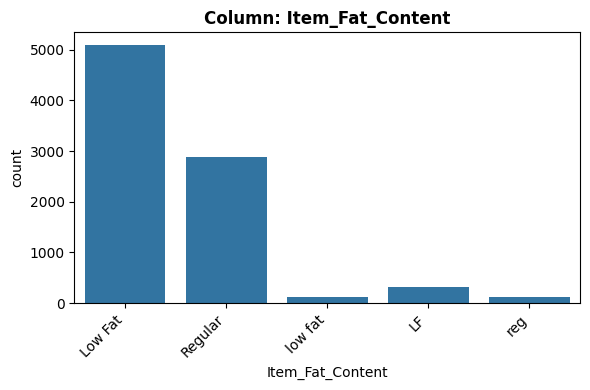

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'Low Fat' occurs 5089 times (59.71%)
- Not constant or quasi-constant.


In [ ]:
plotting_cat(df, 'Item_Fat_Content') ;

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - It's NOT

4. What is the cardinality? Is it high?
  - 2 8 unique categories.
  - Not high cardinality

5. Would we know this BEFORE the target is determined?
  - YES

6. Is there a business case/understanding reason to exclude based on our business case?
  - NO


### Item_Visibility
Description: The percentage of total display area of all products in a store allocated to the particular product

In [ ]:
df['Item_Visibility'].dtype

dtype('float64')

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- NaN's Found: 0 (0.0%)
 Unique Values: 7880 
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


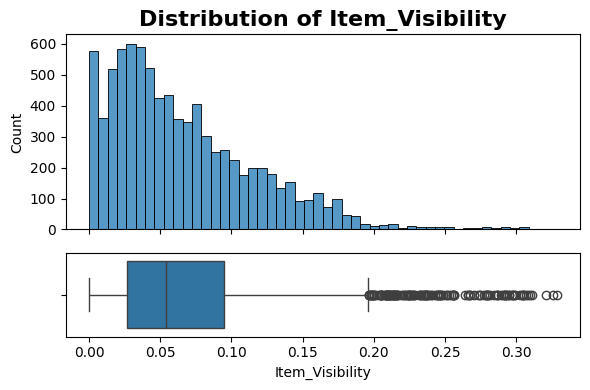

In [ ]:
plotting_numeric(df, 'Item_Visibility') ;

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 5 Null value, persentage = 6.49%
  - was imputed with median
  
3. Is the feature constant or quasi-constant?
  - It's NOT

4. What is the cardinality? Is it high?
  - CAN'T SPECIFY

5. Would we know this BEFORE the target is determined?
  - YES

6. Is there a business case/understanding reason to exclude based on our business case?
  - NO

### Item_Weight
Description: Weight of product

In [ ]:
df['Item_Weight'].dtype

dtype('float64')

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- NaN's Found: 1463 (17.17%)
 Unique Values: 415 
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


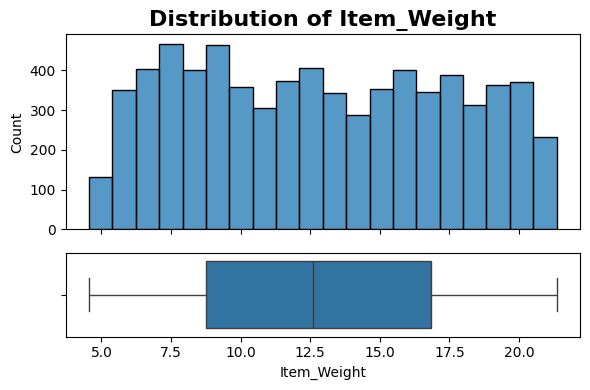

In [ ]:
plotting_numeric(df, 'Item_Weight') ;

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 Null value, persentage = 17.17%
  - was imputed with median
  
3. Is the feature constant or quasi-constant?
  - It's NOT

4. What is the cardinality? Is it high?
  - CAN'T SPECIFY

5. Would we know this BEFORE the target is determined?
  - YES

6. Is there a business case/understanding reason to exclude based on our business case?
  - NO

### Item_Type
Description: The category to which the product belongs

In [ ]:
df['Item_Type'].dtype

dtype('O')

<ipython-input-5-a3d29dd0822c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


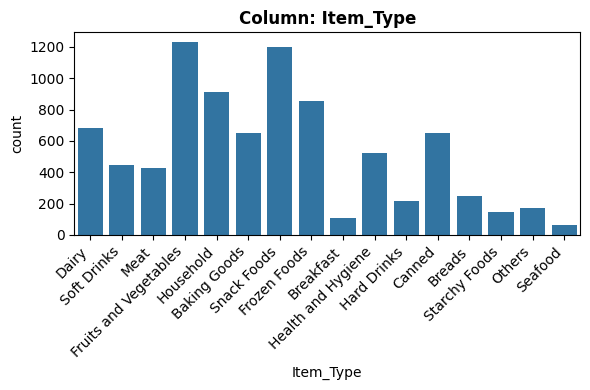

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [ ]:
plotting_cat(df, 'Item_Type') ;

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - It's NOT

4. What is the cardinality? Is it high?
  - 16 unique categories.
  - Not high cardinality?

5. Would we know this BEFORE the target is determined?
  - YES

6. Is there a business case/understanding reason to exclude based on our business case?
  - NO

###Item_MRP
Description: Maximum Retail Price (list price) of the product

In [ ]:
df['Item_MRP'].dtype

dtype('float64')

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- NaN's Found: 0 (0.0%)
 Unique Values: 5938 
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


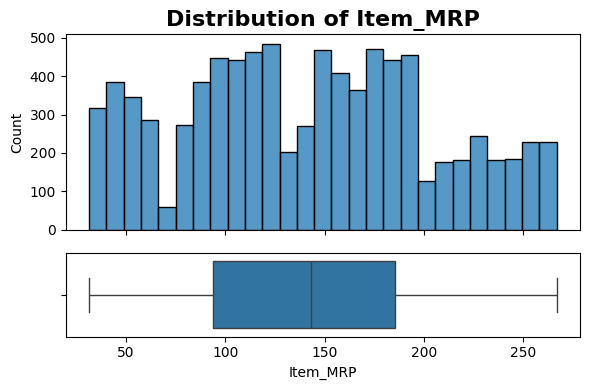

In [ ]:
plotting_numeric(df, 'Item_MRP') ;

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 Null value
  
3. Is the feature constant or quasi-constant?
  - It's NOT

4. What is the cardinality? Is it high?
  - CAN'T SPECIFY

5. Would we know this BEFORE the target is determined?
  - YES

6. Is there a business case/understanding reason to exclude based on our business case?
  - NO

### Outlet_Identifier
Description: Store ID

In [ ]:
df['Outlet_Identifier'].dtype

dtype('O')

<ipython-input-5-a3d29dd0822c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


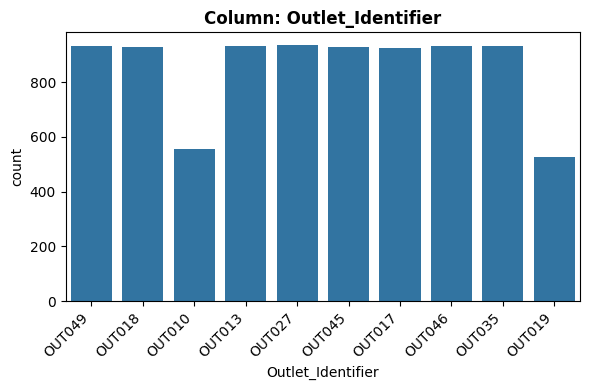

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [ ]:
plotting_cat(df, 'Outlet_Identifier') ;

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - It's NOT

4. What is the cardinality? Is it high?
  - 10 unique categories.
  - A high cardinality

5. Would we know this BEFORE the target is determined?
  - YES

6. Is there a business case/understanding reason to exclude based on our business case?
  - NO

### Outlet_Establishment_Year
Description: The year in which store was established

In [ ]:
df['Outlet_Establishment_Year'].dtype

dtype('int64')

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- NaN's Found: 0 (0.0%)
 Unique Values: 9 
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


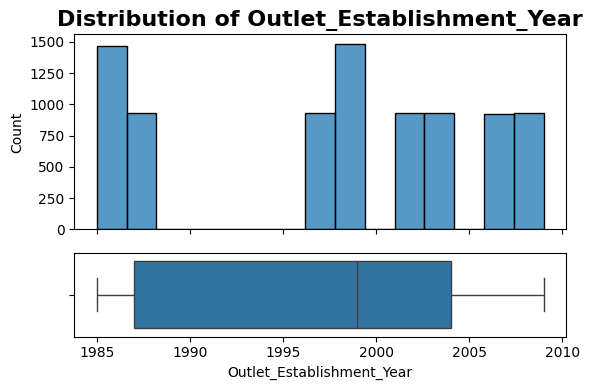

In [ ]:
plotting_numeric(df, 'Outlet_Establishment_Year') ;

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 Null value
  
3. Is the feature constant or quasi-constant?
  - It's NOT

4. What is the cardinality? Is it high?
  - CAN'T SPECIFY

5. Would we know this BEFORE the target is determined?
  - YES

6. Is there a business case/understanding reason to exclude based on our business case?
  - NO

### Outlet_Size
Description: The size of the store in terms of ground area covered

In [ ]:
df['Outlet_Size'].dtype

dtype('O')

<ipython-input-5-a3d29dd0822c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


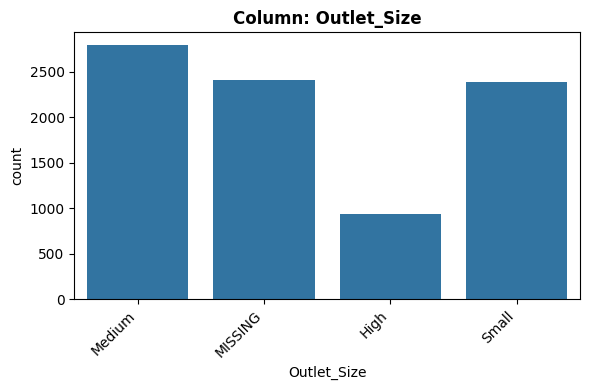

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [ ]:
plotting_cat(df, 'Outlet_Size') ;

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 null values (28.28%)

3. Is the feature constant or quasi-constant?
  - It's NOT

4. What is the cardinality? Is it high?
  - 4 unique categories.
  - Not high cardinality

5. Would we know this BEFORE the target is determined?
  - YES

6. Is there a business case/understanding reason to exclude based on our business case?
  - NO

###Outlet_Location_Type
Description: The type of area in which the store is located

In [ ]:
df['Outlet_Location_Type'].dtype

dtype('O')

<ipython-input-5-a3d29dd0822c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


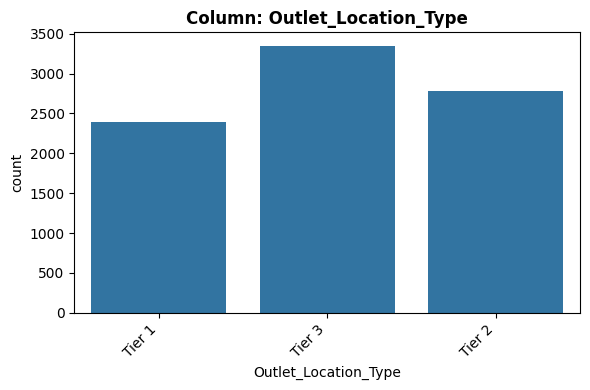

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [ ]:
plotting_cat(df, 'Outlet_Location_Type') ;

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - It's NOT

4. What is the cardinality? Is it high?
  - 3 unique categories.
  - Not a high cardinality

5. Would we know this BEFORE the target is determined?
  - YES

6. Is there a business case/understanding reason to exclude based on our business case?
  - NO

### Outlet_Type
Description: Whether the outlet is a grocery store or some sort of supermarket

In [ ]:
df['Outlet_Type'].dtype

dtype('O')

<ipython-input-5-a3d29dd0822c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


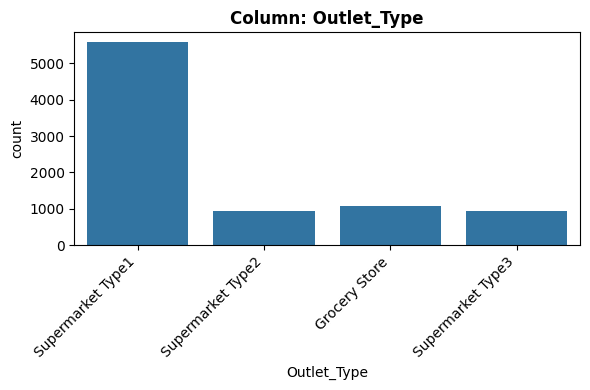

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [ ]:
plotting_cat(df, 'Outlet_Type') ;

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - It's NOT

4. What is the cardinality? Is it high?
  - 4 unique categories.
  - Not a high cardinality

5. Would we know this BEFORE the target is determined?
  - YES

6. Is there a business case/understanding reason to exclude based on our business case?
  - NO

### Item_Outlet_Sales
Description: Sales of the product in the particular store. This is the target variable to be predicted.

In [ ]:
df['Item_Outlet_Sales'].dtype

dtype('float64')

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- NaN's Found: 0 (0.0%)
 Unique Values: 3493 
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


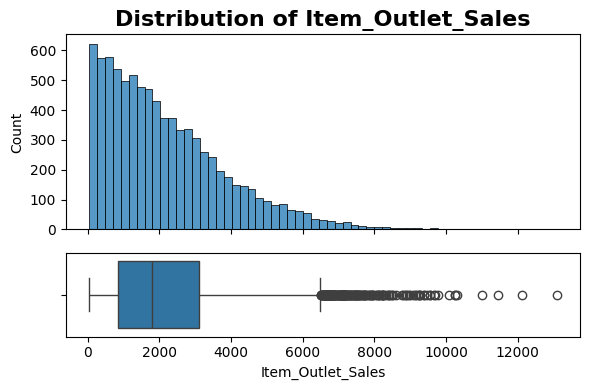

In [ ]:
plotting_numeric(df, 'Item_Outlet_Sales') ;

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - It's NOT

4. What is the cardinality? Is it high?
  - Can't Specify

5. Would we know this BEFORE the target is determined?
  - YES

6. Is there a business case/understanding reason to exclude based on our business case?
  - NO

# Multivariate visualization plotting each feature vs. the target

The target is Item_Outlet_Sales

### Item_Fat_Content whith Item_Outlet_Sales

In [ ]:
# Confirming the type
df['Item_Fat_Content'].dtype

dtype('O')

<ipython-input-7-01143a83c19a>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


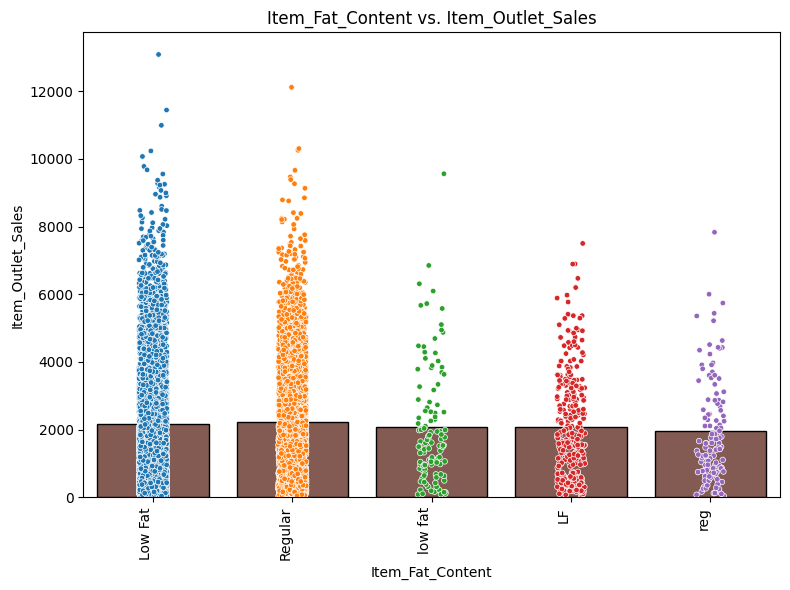

In [ ]:
# Using the propriate function accourding to the type
plotting_cat_target(df, 'Item_Fat_Content', 'Item_Outlet_Sales') ;

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think people may prefer Low Fat Items.
  - Does this feature appear to be a predictor of the target?
    - Yes, the same way we predicted.

### Item_Weight Vs. Item_Outlet_Sales

In [ ]:
df["Item_Weight"].dtype

dtype('float64')

<ipython-input-7-01143a83c19a>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


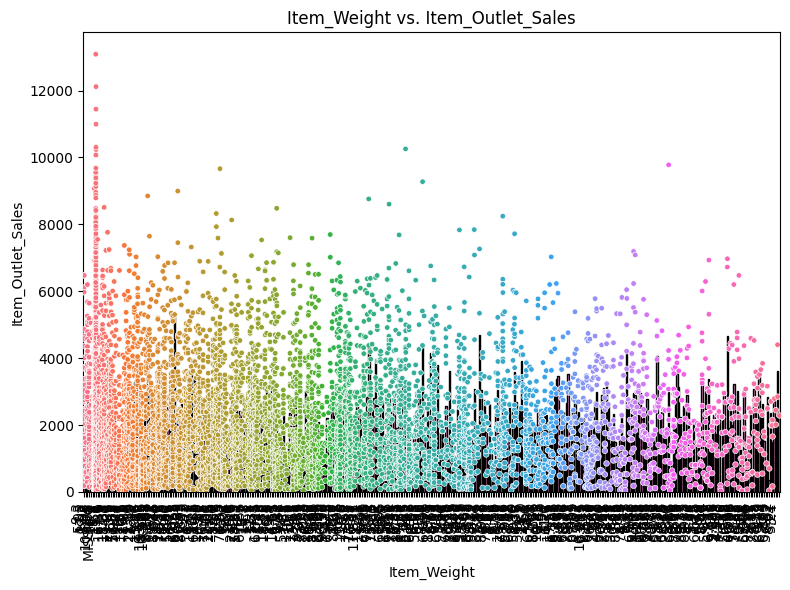

In [ ]:
plotting_cat_target(df, 'Item_Weight', 'Item_Outlet_Sales');


Feature vs. Target Observations:
 - Based on business understanding, would you expect this feature to be a
  predictor of the target?   
Yes, I think people may prefer items with lower weight, which might affect sales. It's reasonable to believe that the weight of an item could influence customer behavior, especially if customers are looking for lightweight products.

 - Does this feature appear to be a predictor of the target?

   Based on the scatter plot, the relationship between Item_Weight and Item_Outlet_Sales doesn't show a clear or strong pattern. This suggests that item weight alone may not be a strong predictor of sales, as sales values seem to be widely dispersed across different item weights.

### Item_Visibility Vs. Item_Outlet_Sales

In [ ]:
df["Item_Visibility"].dtype

dtype('float64')

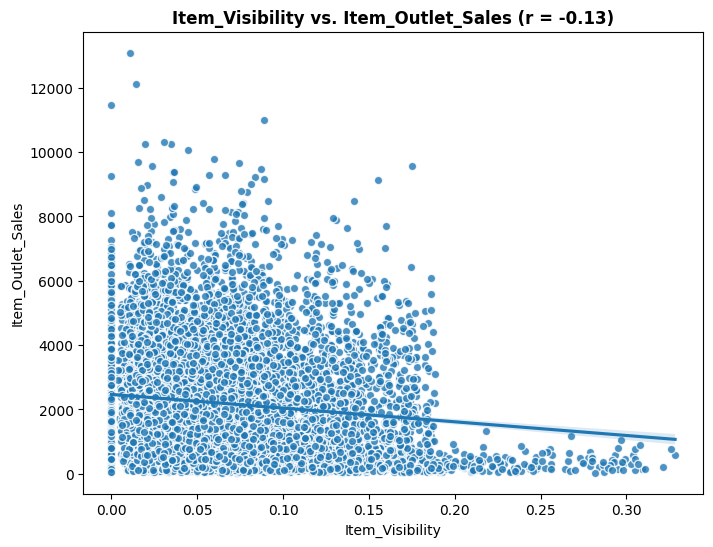

In [ ]:
plotting_numeric_target(df, 'Item_Visibility', 'Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?

 Yes, Item_Visibility could be a reasonable predictor of sales (Item_Outlet_Sales) based on business understanding. Generally, it is expected that items with higher visibility (i.e., more prominently displayed or advertised) would be more likely to sell, as customers are more likely to notice them.

- Does this feature appear to be a predictor of the target?

 The scatter plot shows a weak negative correlation (r = -0.13) between Item_Visibility and Item_Outlet_Sales. While there is a downward trend, the relationship is weak, meaning that Item_Visibility alone may not be a strong predictor of sales. Other factors might play a more significant role in driving sales, although visibility could still be a contributing factor in combination with other features.

### Item_Type Vs. Item_Outlet_Sales

In [ ]:
df["Item_Type"].dtype

dtype('O')

<ipython-input-7-01143a83c19a>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


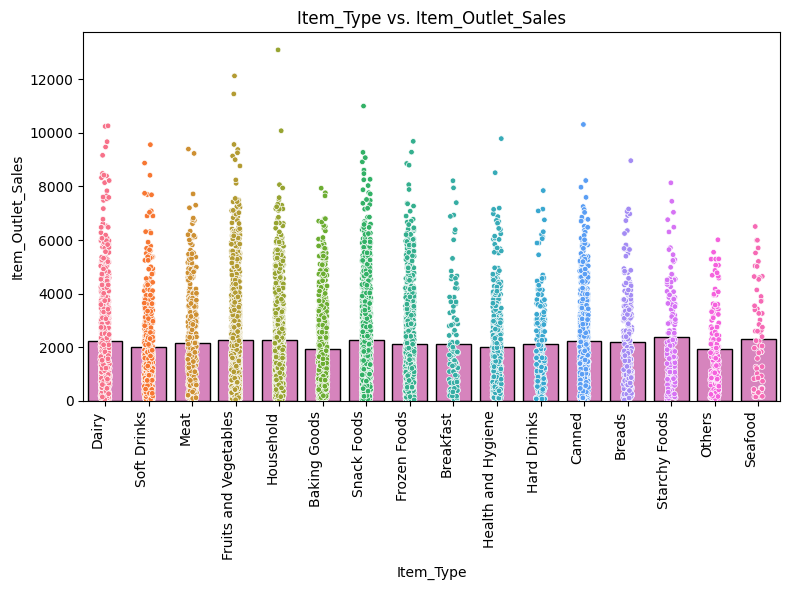

In [ ]:
plotting_cat_target(df, 'Item_Type', 'Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?

 Yes, based on business understanding, it would be reasonable to expect that Item_Type (the type of product) could be a significant predictor of sales (Item_Outlet_Sales). Different product categories, such as dairy, soft drinks, or household items, may have varying levels of demand, seasonal trends, or customer preferences, which could influence sales.

- Does this feature appear to be a predictor of the target?

 The plot shows that there is variability in sales across different Item_Type categories, suggesting that item type does have some influence on sales. Some categories like "Seafood" and "Health and Hygiene" appear to have lower overall sales, while others, like "Dairy" and "Soft Drinks," show higher variability and potentially higher sales. This indicates that Item_Type could be a useful predictor of sales, though it may not be the only factor determining sales performance.

### Item_Identifier Vs. Item_Outlet_Sales

In [ ]:
df["Item_Identifier"].dtype

dtype('O')

<ipython-input-7-01143a83c19a>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


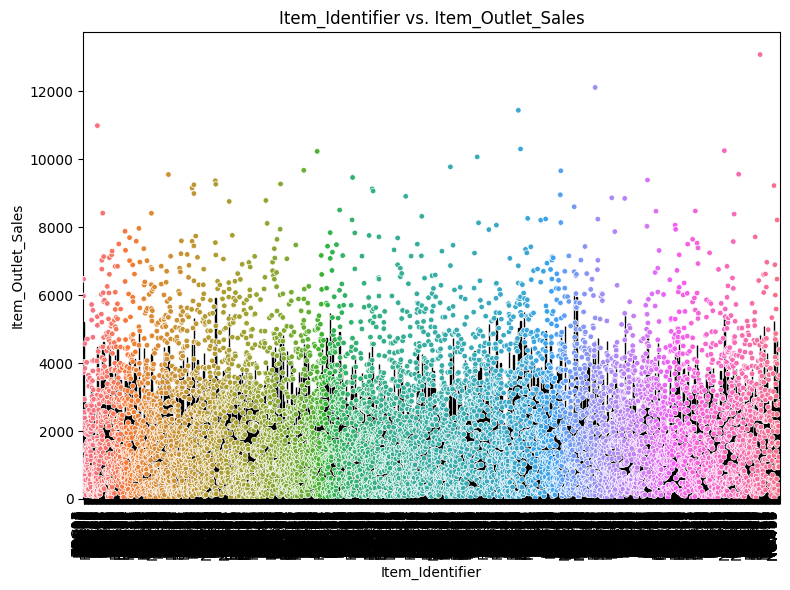

In [ ]:
plotting_cat_target(df, 'Item_Identifier', 'Item_Outlet_Sales');

-  Based on your business understanding, would you expect this feature to be a predictor of the target?

 From a business perspective, "Item_Identifier" is typically a categorical or unique identifier for products, so I wouldn't expect it to directly predict "Item_Outlet_Sales." However, if there are patterns within specific categories or types of items (e.g., product types or groups), it could indirectly provide some predictive power when combined with other features.


- Does this feature appear to be a predictor of the target?

 From the scatter plot, it doesn’t seem that "Item_Identifier" is a strong predictor of "Item_Outlet_Sales." The points are dispersed quite randomly, with no obvious trend or correlation visible. This indicates that "Item_Identifier" in its raw form is unlikely to be a useful predictor of sales without further feature engineering, such as grouping items based on type or other attributes.

### Item_MRP Vs. Item_Outlet_Sales

In [ ]:
df["Item_MRP"].dtype

dtype('float64')

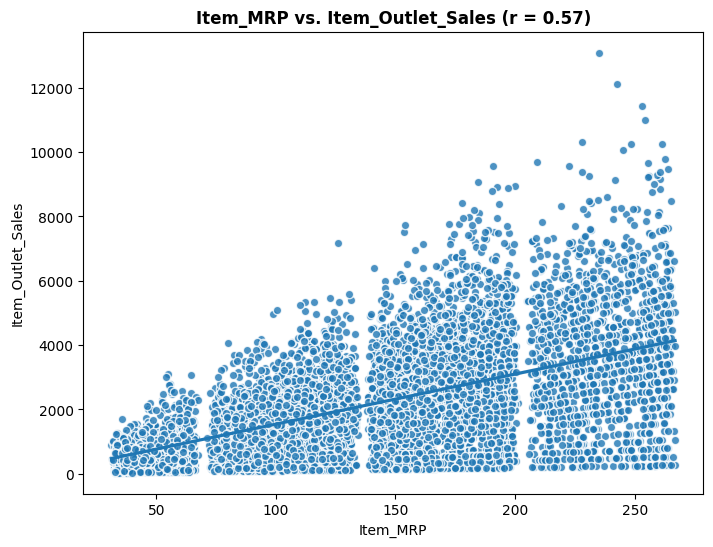

In [ ]:
plotting_numeric_target(df, 'Item_MRP', 'Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?

 Yes, based on the data and business understanding, it appears that Item MRP is a predictor of Item Outlet Sales. The positive correlation and the upward trend in the scatter plot strongly support this conclusion. However, it's important to consider other factors that might influence sales, such as product popularity, promotions, and store location.


- Does this feature appear to be a predictor of the target?

 The provided scatter plot and the correlation coefficient (r = 0.57) support this intuition. The plot shows a clear upward trend, indicating that as the MRP of an item increases, so does its outlet sales. The correlation coefficient of 0.57 suggests a moderately strong positive relationship.


### Outlet_Identifier Vs. Item_Outlet_Sales

In [ ]:
df["Outlet_Identifier"].dtype

dtype('O')

<ipython-input-7-01143a83c19a>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


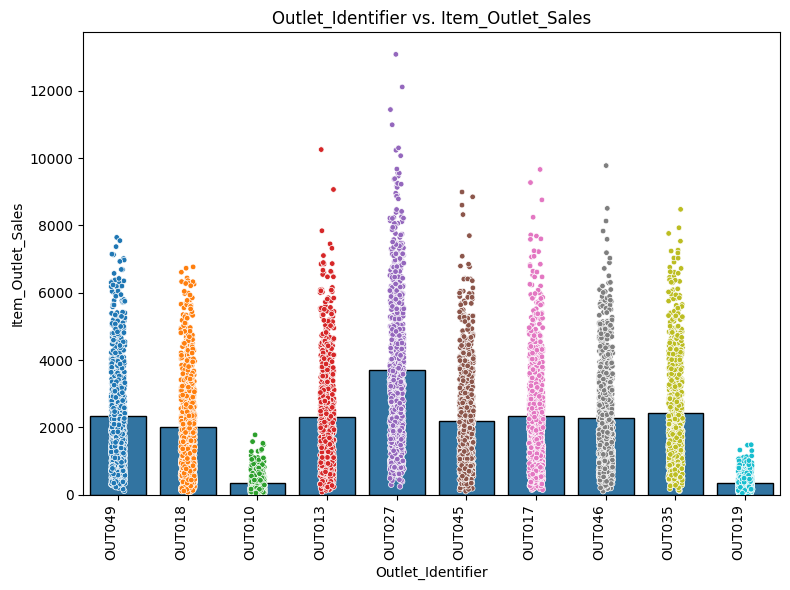

In [ ]:
plotting_cat_target(df, 'Outlet_Identifier', 'Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?

 Outlet size is likely to influence sales. Larger outlets can accommodate a wider variety of products, have more space for customer traffic, and potentially attract more customers. Therefore, we expect Outlet_Size to be a positive predictor of Item_Outlet_Sales.





- Does this feature appear to be a predictor of the target?

 Based on the analysis, it appears that Outlet_Size is indeed positively correlated with Item_Outlet_Sales. Larger outlets tend to have higher overall sales, supporting our business understanding. However, other factors, such as location, product assortment, and marketing strategies, may also play a role in determining sales performance.


### Outlet_Type Vs. Item_Outlet_Sales

In [ ]:
df["Outlet_Type"].dtype

dtype('O')

<ipython-input-7-01143a83c19a>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


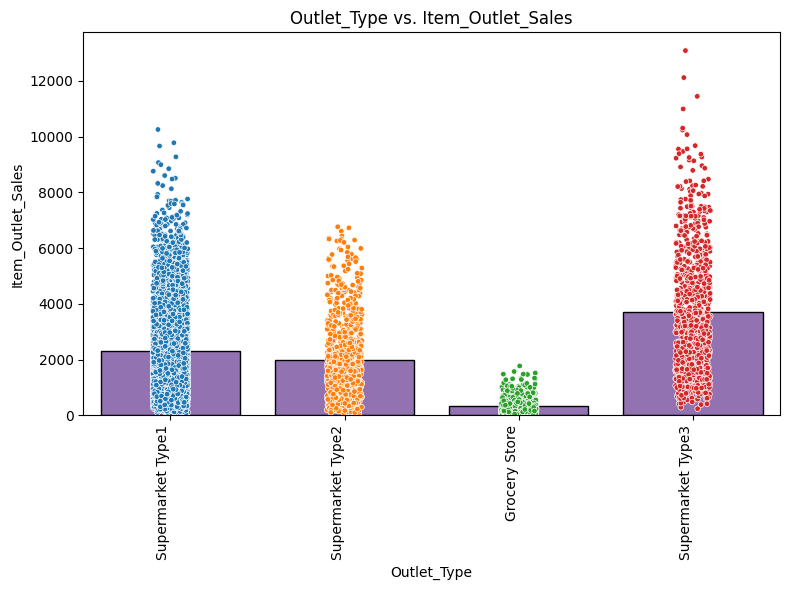

In [ ]:
plotting_cat_target(df, 'Outlet_Type', 'Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?

 based on the data and business understanding, Outlet Type might have some influence on Item Outlet Sales, but it's not a strong predictor. The box plot shows that there are differences in sales distributions across outlet types, but these differences are not consistent or substantial enough to confidently claim a strong relationship.


- Does this feature appear to be a predictor of the target?

 the provided box plot shows the distribution of Item Outlet Sales for each Outlet Type. While there are some variations in the median sales and the spread of data points across different outlet types, the differences are not as pronounced as in the previous analysis.

### Outlet_Size Vs. Item_Outlet_Sales

In [ ]:
df["Outlet_Size"].dtype

dtype('O')

<ipython-input-7-01143a83c19a>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


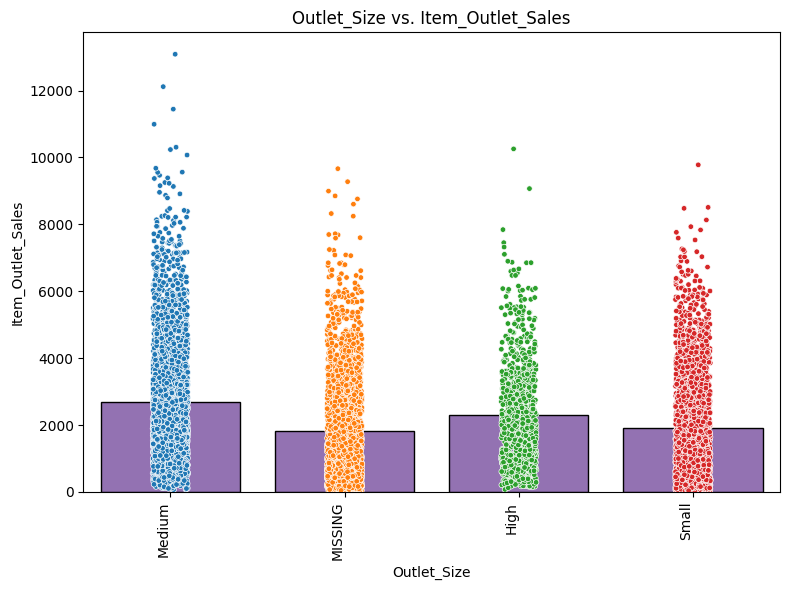

In [ ]:
plotting_cat_target(df, 'Outlet_Size', 'Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?

 Outlet Size is likely to influence sales. Larger outlets can accommodate a wider variety of products, have more space for customer traffic, and potentially attract more customers. Therefore, we expect Outlet Size to be a positive predictor of Item Outlet Sales.


- Does this feature appear to be a predictor of the target?

 The provided box plot shows the distribution of Item Outlet Sales for each Outlet Size category. It appears that there are some differences in sales performance across different outlet sizes:

 Medium and Small outlets have similar distributions of sales.
 High outlets show a slightly higher median sales and a wider spread of data points.
 Unknown outlets have the lowest median sales and a relatively narrow spread


### Outlet_Location_Type Vs. Item_Outlet_Sales

In [ ]:
df["Outlet_Location_Type"].dtype

dtype('O')

<ipython-input-7-01143a83c19a>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


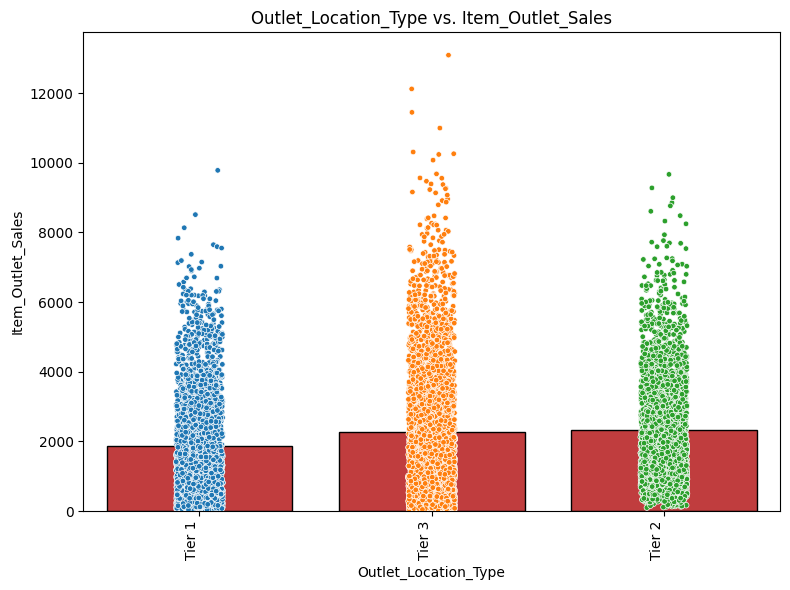

In [ ]:
plotting_cat_target(df, 'Outlet_Location_Type', 'Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?

 Outlet Location Type represents the location tier of the retail outlet. It's reasonable to expect that the location of an outlet might influence its sales performance. For example, outlets in Tier 1 locations might have higher customer footfall and attract more affluent customers compared to outlets in Tier 3 locations.


- Does this feature appear to be a predictor of the target?
 The provided box plot shows the distribution of Item Outlet Sales for each Outlet Location Type. It appears that there are some differences in sales performance across different location types:

 Tier 1 outlets have the highest median sales and a wider spread of data points.

 Tier 2 and Tier 3 outlets have similar median sales, but Tier 2 outlets show a slightly wider spread.



### Outlet_Establishment_Year Vs. Item_Outlet_Sales

In [ ]:
df["Outlet_Establishment_Year"].dtype

dtype('int64')

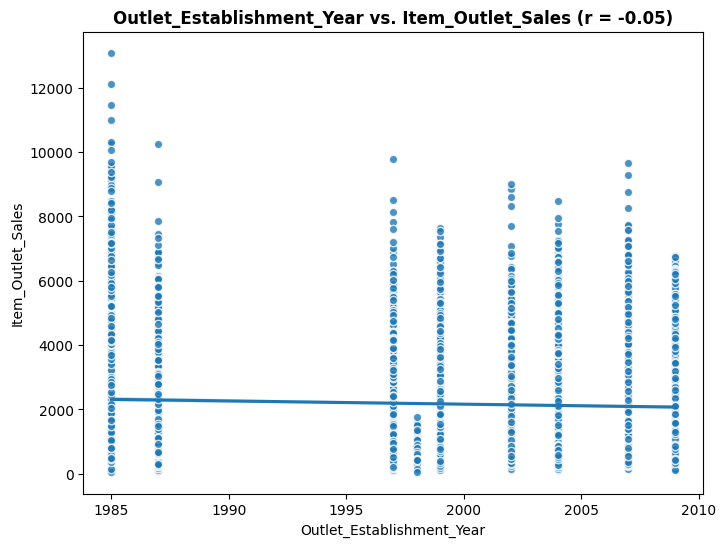

In [ ]:
plotting_numeric_target(df, 'Outlet_Establishment_Year', 'Item_Outlet_Sales');

- Based on your business understanding, would you expect this feature to be a predictor of the target?

 No,"Outlet_Establishment_Year" might not be a strong predictor of "Item_Outlet_Sales." While it's possible that newer or older outlets could experience different sales trends due to factors like customer trust or store renovations, the year an outlet was established is likely not directly tied to sales unless considered with other features like store location or size.


- Does this feature appear to be a predictor of the target?

 Based on the scatter plot and the correlation coefficient (r = -0.05), there is no strong relationship between "Outlet_Establishment_Year" and "Item_Outlet_Sales." The points are widely spread, and the flat line indicates a very weak or no correlation. This suggests that "Outlet_Establishment_Year" is not a good predictor of the target variable "Item_Outlet_Sales" in this dataset.